# TRABALHO FINAL

> SEL0326 - CONTROLE DE SISTEMAS LINEARES

### Controle LQR de um modelo de Sistema de Potência Máquina versus Barramento Infinito

In [37]:
import numpy as np 
import matplotlib.pyplot as plt
import control.matlab as matlab

* Espaço de eestados do sistema: 
$ \dot{x} = Ax + Bu $, $ \ x(0) = x_0$

## Etapa 1: Criação do modelo nominal do grupo 

In [38]:
# Matrix A
A = np.array([[0, 376.9911, 0, 0],
              [-0.15685, 0, -0.0784, 0],
              [-0.16725, 0, -0.46296, 0.166667],
              [1572.825, 0, -5416.98, -100]])

# Matrix B
B = np.array([[0],
              [0],
              [0],
              [10000]])

# Generate delta_A
delta_A = np.random.uniform(-0.05, 0.05, size=A.shape) * A

A_new = A + delta_A

A_new


array([[ 0.00000000e+00,  3.84615902e+02,  0.00000000e+00,
         0.00000000e+00],
       [-1.55336933e-01,  0.00000000e+00, -7.88009991e-02,
         0.00000000e+00],
       [-1.75121766e-01,  0.00000000e+00, -4.84419615e-01,
         1.72698116e-01],
       [ 1.51770535e+03,  0.00000000e+00, -5.52961953e+03,
        -9.62404293e+01]])

## Etapa 2: Definição do funcional LQR

$ J = \int_{0}^{\infty} (x^TQx + u^TRu)dt $

In [39]:
# Q e R matrizes diagonais e postivias

Q = np.diag([1, 1, 1, 1])
R = np.diag([1])

# obs: Q tem que ter a mesma dimensão de A e R tem que ter a mesma dimensão de B

Q, R


(array([[1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]]),
 array([[1]]))

## Etapa 3: Cálculo do ganho ótimo K para o modelo nominal do grupo

* Modelo: $ \dot{x} = (A + \Delta A) x + Bu $, $ \ x(0) = x_0$

* Realimentação: $ u = -Kx $

* Sistema em malha fechada: $ \dot{x} = (A + \Delta A - BK) x $

* Condição inicial: $x_0 = [0, 0, 0, 0.1] ^T $

a) calcule o ganho ótimo K que minimiza o funcional J

b) calcule o valor do funcional J para o ganho ótimo K obtido no item anterior e compare o valor calculado com o valor da expressão $x_0 ^T P x_0$

c) Apresente o gráfico da resposta no tempo do modelo com incertezas em malha fechada

In [40]:
# a) 

# solve the algebraic Riccati equation to obtain the LQR gain matrix K
K, S, E = matlab.lqr(A, B, Q, R)

# create the closed-loop system with the LQR controller
Ac = A - B @ K

sys = matlab.ss(A, B, np.eye(4), 0)
sys_lqr = matlab.ss(Ac, B, np.eye(4), 0)

# print the LQR gain matrix
print(f"LQR gain matrix: {K}")

sys 

LQR gain matrix: [[ 0.57755561 -2.14038763  0.00825644  0.99005014]]


<LinearIOSystem:sys[14]:['u[0]']->['y[0]', 'y[1]', 'y[2]', 'y[3]']>

y:  [[[ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 0.00000000e+00]]

 [[-2.28734134e-04]
  [-1.11140819e-04]
  [ 1.84036661e-01]
  [ 8.16929797e+01]]

 [[-2.69434176e-03]
  [-6.13155717e-04]
  [ 4.58608063e-01]
  [ 8.03906738e+01]]

 ...

 [[ 7.37741366e+00]
  [-1.87776609e+00]
  [ 1.47555021e+01]
  [-5.20244005e+02]]

 [[-6.90942895e+00]
  [-1.90012576e+00]
  [ 1.26880386e+01]
  [-6.39817896e+02]]

 [[-2.11825480e+01]
  [-1.87405657e+00]
  [ 1.03147761e+01]
  [-7.44117763e+02]]]


ValueError: x and y can be no greater than 2D, but have shapes (1000,) and (1000, 4, 1)

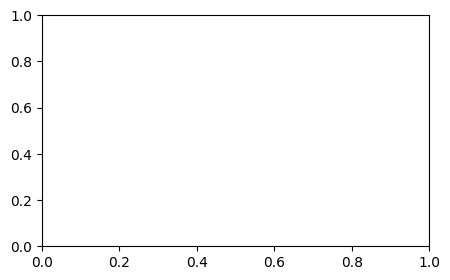

In [43]:
# plot 
t = np.linspace(0, 20, 1000)
y, _ = matlab.step(sys, t)
ylqr, _ = matlab.step(sys_lqr, t)

print('y: ', y)

fig, ax = plt.subplots(figsize=(5, 3))

ax.plot(t, y, label='A')
ax.plot(t, ylqr, label='Acl')
ax.legend()

# limit y axis
plt.ylim(0, 2)

plt.show()